In [2]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot appearance
sns.set(style="whitegrid")

In [4]:
# Load the sales dataset
df = pd.read_csv("sales_data.csv")
# Display first 5 rows
df.head()

,Order_ID,Order_Date,Customer_ID,Customer_Segment,Region,Product_Category,Product_Name,Sales,Quantity,Profit
0,ORD1000,2022-01-01,CUST202,Home Office,West,Office Supplies,Monitor,3323.44,7,249.11
1,ORD1001,2022-01-02,CUST535,Home Office,East,Office Supplies,Desk,4997.13,9,-166.28
2,ORD1002,2022-01-03,CUST960,Corporate,Central,Furniture,Desk,336.24,5,361.06
3,ORD1003,2022-01-04,CUST370,Home Office,East,Furniture,Monitor,4888.15,9,-214.81
4,ORD1004,2022-01-05,CUST206,Consumer,West,Furniture,Phone,2093.85,4,1280.19


In [5]:
# Dataset shape (rows, columns)
df.shape


(500, 10)

In [6]:
# Column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          500 non-null    object 
 1   Order_Date        500 non-null    object 
 2   Customer_ID       500 non-null    object 
 3   Customer_Segment  500 non-null    object 
 4   Region            500 non-null    object 
 5   Product_Category  500 non-null    object 
 6   Product_Name      500 non-null    object 
 7   Sales             500 non-null    float64
 8   Quantity          500 non-null    int64  
 9   Profit            500 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 39.2+ KB


In [8]:
# Statistical summary for numerical columns
df.describe()


,Sales,Quantity,Profit
count,500.000000,500.000000,500.000000
mean,2562.403060,5.126000,492.703660
std,1399.536005,2.609165,588.726235
min,115.770000,1.000000,-499.730000
25%,1344.912500,3.000000,14.502500
50%,2637.410000,5.000000,467.480000
75%,3727.325000,7.250000,1023.650000
max,4997.130000,9.000000,1495.640000


In [9]:
# Check null values column-wise
df.isnull().sum()


Order_ID            0
Order_Date          0
Customer_ID         0
Customer_Segment    0
Region              0
Product_Category    0
Product_Name        0
Sales               0
Quantity            0
Profit              0
dtype: int64

In [10]:
# Remove rows with missing values (safe because dataset is large)
df.dropna(inplace=True)


In [11]:
# Check duplicate rows
df.duplicated().sum()


0

In [12]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [13]:
# Convert Order_Date to datetime format
df["Order_Date"] = pd.to_datetime(df["Order_Date"])


In [14]:
# Extract month and year from Order_Date
df["Month"] = df["Order_Date"].dt.month
df["Year"] = df["Order_Date"].dt.year


In [15]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
sales_by_region


Region
Central    354022.45
West       340404.81
East       314434.46
South      272339.81
Name: Sales, dtype: float64

In [16]:
profit_by_category = df.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False)
profit_by_category


Product_Category
Technology         90011.64
Office Supplies    78529.59
Furniture          77810.60
Name: Profit, dtype: float64

In [17]:
monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales


Month
1     173634.01
2     151245.09
3     156334.65
4     147601.01
5     113989.47
6      85638.27
7      87141.57
8      73223.21
9      70951.22
10     70843.46
11     81467.12
12     69132.45
Name: Sales, dtype: float64

In [18]:
top_products = df.groupby("Product_Name")["Sales"].sum().sort_values(ascending=False).head(10)
top_products


Product_Name
Desk       213014.82
Printer    192155.51
Phone      188051.47
Monitor    185163.11
Chair      176660.69
Pen        164417.89
Laptop     161738.04
Name: Sales, dtype: float64

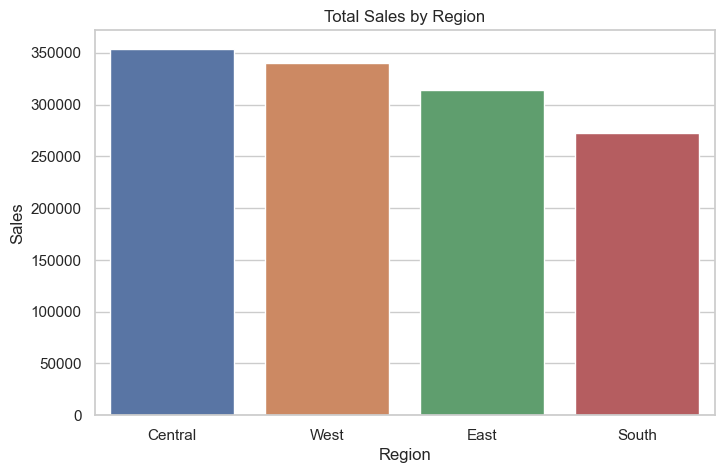

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


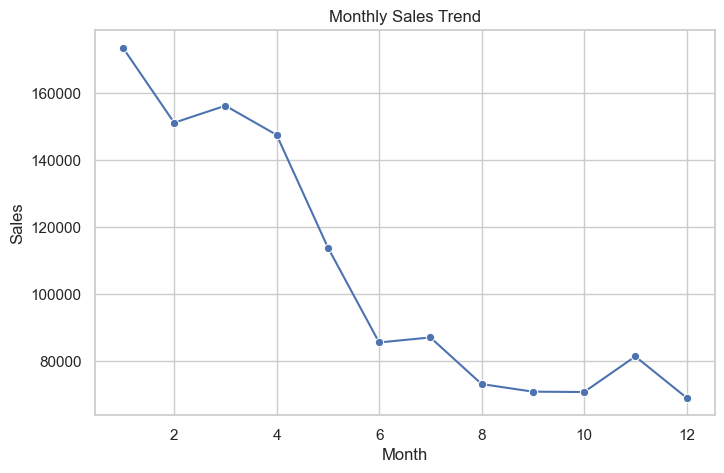

In [20]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


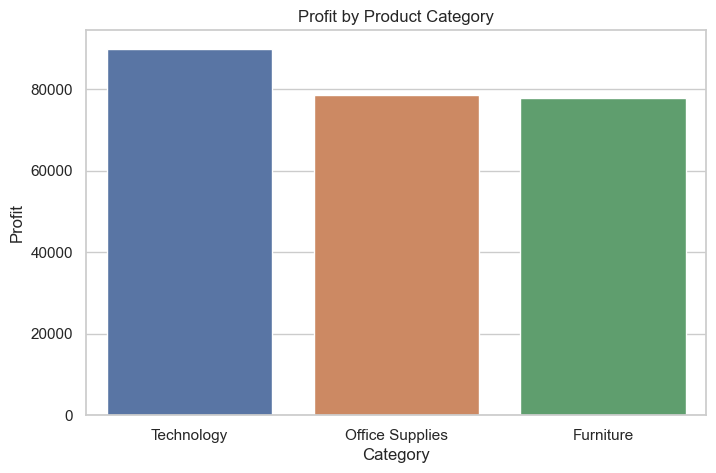

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values)
plt.title("Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()


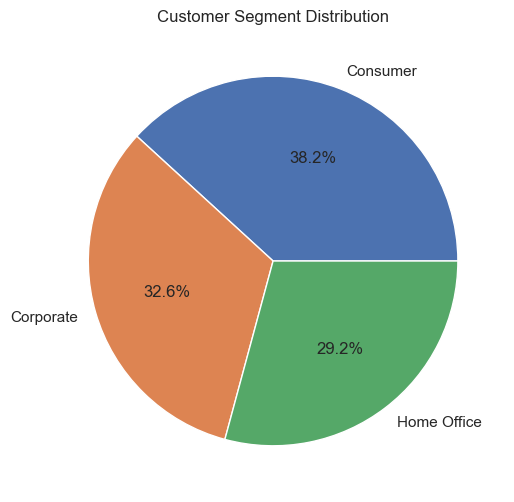

In [23]:
plt.figure(figsize=(6, 6))
df["Customer_Segment"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Customer Segment Distribution")
plt.ylabel("")
plt.show()
